**import google drive using google colab**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


importing **pandas** **numpy** **matplotlib** and **seaborn**

In [ ]:
import numpy as np#using for arithmatic claculations
import matplotlib.pyplot as plt#data visualisation 
import seaborn as sns#data visualisation purpose

loading csv file using pandas and encoding utf-8 


In [ ]:

data=pd.read_csv("/content/gdrive/My Drive/airport/BagTrack Report new2.csv",encoding="ISO-8859-1")## loaded data from the csv file


In [ ]:
data# # display the first five rows from the data

,BagID,MVXR,BHSID,L1 Decision,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime
0,5178,2,0312365478_0280SD,Reject,01-01-2020 00:16:19,Time out,32661.0,01-01-2020 00:16:46,Reject,32887,01-01-2020 00:16:54
1,5180,2,0312365545_0282SD,Reject,01-01-2020 00:19:28,Accept,32661.0,01-01-2020 00:19:41,-,-,-
2,5187,2,0312365871_0293SD,Reject,01-01-2020 00:24:39,Accept,32153.0,01-01-2020 00:24:44,-,-,-
3,5189,2,0312365971_0296SD,Reject,01-01-2020 00:28:31,Accept,32153.0,01-01-2020 00:28:42,-,-,-
4,5196,2,0312366152_0304SD,Reject,01-01-2020 00:33:42,Accept,32153.0,01-01-2020 00:33:47,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
1048569,707,1,0312150214_0331SC,Reject,3/24/2020 12:30:48,Accept,34243.0,3/24/2020 12:31:02,-,-,-
1048570,708,1,0312150213_0332SC,Reject,3/24/2020 12:30:51,Accept,32797.0,3/24/2020 12:31:11,-,-,-
1048571,722,1,0777523317_0349SC,Reject,3/24/2020 12:35:19,Accept,36548.0,3/24/2020 12:35:35,-,-,-
1048572,723,1,0312150421_0350SC,Reject,3/24/2020 12:35:22,Accept,34243.0,3/24/2020 12:35:47,-,-,-


Dropping L1decision and Bagid columns

In [ ]:
data.columns=data.columns.str.replace(' ','')# # remove the trailing spaces from the column names

In [ ]:
data=data.drop(["BagID","L1Decision"],axis=1)#dropped L1Decision column

In [ ]:
data.tail(20)#display last 20 rows

,MVXR,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,BHSID_prefix,Airlines_names
1048554,2,0312232948_0513SD,2020-07-30 05:54:00,Accept,32149.0,2020-07-30 05:54:10,-,-,NaT,312,Indigo
1048555,2,0312232949_0512SD,2020-07-30 05:54:08,Accept,75204.0,2020-07-30 05:54:19,-,-,NaT,312,Indigo
1048556,4,0807786102_0568SF,2020-07-30 05:54:43,Accept,32149.0,2020-07-30 05:54:50,-,-,NaT,807,Air Asia
1048557,2,0000569139_0515SD,2020-07-30 05:54:44,Accept,75204.0,2020-07-30 05:54:53,-,-,NaT,000,MVXR
1048558,2,0312185873_0521SD,2020-07-30 06:03:24,Accept,75204.0,2020-07-30 06:03:44,-,-,NaT,312,Indigo
1048559,4,0807786311_0576SF,2020-07-30 06:03:27,Accept,32149.0,2020-07-30 06:03:45,-,-,NaT,807,Air Asia
1048560,2,0000569147_0523SD,2020-07-30 06:03:32,Reject,32149.0,2020-07-30 06:03:51,Accept,6320,2020-07-30 06:04:32,000,MVXR
1048561,1,0312149748_0296SC,2020-03-24 12:22:21,Reject,32797.0,2020-03-24 12:22:42,Accept,4402,2020-03-24 12:23:29,312,Indigo
1048562,1,0312149695_0297SC,2020-03-24 12:23:47,Accept,34243.0,2020-03-24 12:23:58,-,-,NaT,312,Indigo
1048563,1,0312149966_0312SC,2020-03-24 12:26:27,Accept,34243.0,2020-03-24 12:26:39,-,-,NaT,312,Indigo


In [ ]:
data.describe()#display about the data

,MVXR,L2LoginID
count,1.048574e+06,1.015291e+06
mean,2.506897e+00,2.697822e+04
std,9.723181e-01,1.259051e+04
min,1.000000e+00,1.805000e+03
25%,2.000000e+00,3.092100e+04
50%,2.000000e+00,3.264400e+04
75%,3.000000e+00,3.287800e+04
max,4.000000e+00,7.520400e+04


Removing spaces from column names

checking na values in data

In [ ]:
data.isna().sum()

MVXR                  0
BHSID                 6
Level1Decision        0
L2Decision            0
L2LoginID         33283
L2DecisionTime        0
L3Decision            0
L3LoginID          1798
L3DecisionTime        0
dtype: int64

Dropping na values from BHSID

In [ ]:
data=data.dropna(subset=["BHSID"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048568 entries, 0 to 1048573
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   MVXR            1048568 non-null  int64         
 1   BHSID           1048568 non-null  object        
 2   Level1Decision  1048568 non-null  datetime64[ns]
 3   L2Decision      1048568 non-null  object        
 4   L2LoginID       1015285 non-null  float64       
 5   L2DecisionTime  1048568 non-null  datetime64[ns]
 6   L3Decision      1048568 non-null  object        
 7   L3LoginID       1046770 non-null  object        
 8   L3DecisionTime  235833 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 80.0+ MB


Converting object format to datetime format

In [ ]:

data["Level1Decision"]=pd.to_datetime(data["Level1Decision"])
data["L2DecisionTime"]=pd.to_datetime(data["L2DecisionTime"])

data["L3DecisionTime"]=pd.to_datetime(data["L3DecisionTime"],errors='coerce')

created a dictionary of codes and related airlines names

In [ ]:
airways = {'001': 'American Airlines',
 '002': 'CargoItalia (alternate)',
 '005': 'Continental Airlines',
 '006': 'Delta Air Lines',
 '012': 'Northwest Airlines (alternate site)',
 '014': 'Air Canada',
 '016': 'United Airlines Cargo',
 '018': 'Canadian Airlines Int´l',
 '020': 'Lufthansa Cargo AG',
 '023': 'Fedex',
 '027': 'Alaska Airlines',
 '037': 'USAirways',
 '042': 'VARIG Brazilian Airlines',
 '043': 'Dragonair',
 '045': 'LAN Chile',
 '047': 'TAP Air Portugal',
 '048': 'Cyprus Airways',
 '050': 'Olympic Airways',
 '053': 'Aer Lingus Cargo',
 '055': 'Alitalia',
 '057': 'Air France',
 '058': 'Indian Airlines',
 '061': 'Air Seychelles',
 '064': 'Czech Airlines',
 '065': 'Saudi Arabian Airlines',
 '070': 'Syrian Arab Airlines',
 '071': 'Ethiopian Airlines',
 '072': 'Gulf Air',
 '074': 'KLM Cargo',
 '075': 'Iberia',
 '076': 'Middle East Airlines',
 '077': 'Egyptair',
 '079': 'Philippine Airlines',
 '080': 'LOT Polish Airlines',
 '081': 'Qantas Airways',
 '082': 'Brussels Airlines',
 '083': 'South African Airways',
 '086': 'Air New Zealand',
 '090': 'Kingfisher Airlines',
 '093': 'KD Avia',
 '096': 'Iran Air',
 '098': 'Air India',
 '105': 'Finnair',
 '106': 'Caribbean Airlines',
 '108': 'Icelandair',
 '112': 'China Cargo Airlines',
 '114': 'EL AL',
 '115': 'JAT Airways',
 '117': 'SAS-Scandinavian Airlines System',
 '118': 'TAAG Angola Airlines',
 '119': 'Air ALM',
 '124': 'Air Algerie',
 '125': 'British Airways',
 '126': 'Garuda Indonesia',
 '129': 'Martinair Cargo',
 '131': 'Japan Airlines',
 '133': 'LACSA Airlines of Costa Rica',
 '139': 'Aeromexico Cargo',
 '140': 'LIAT Airlines',
 '147': 'Royal Air Maroc',
 '148': 'Libyan Airlines',
 '157': 'Qatar Airways',
 '160': 'Cathay Pacific Airways',
 '163': 'TNT Airways',
 '165': 'Adria Airways',
 '172': 'Cargolux Airlines',
 '176': 'Emirates',
 '180': 'Korean Air',
 '182': 'Malev Hungarian Airlines',
 '183': 'VARIG Brazilian Airlines',
 '189': 'Jade Cargo International',
 '201': 'Air Jamaica',
 '202': 'TACA',
 '205': 'ANA All Nippon Cargo',
 '214': 'Pakistan Int´l Airlines',
 '217': 'Thai Airways',
 '229': 'Kuwait Airways',
 '230': 'Copa Airlines Cargo',
 '231': 'Lauda Air',
 '232': 'Homepage',
 '234': 'Japan Air System',
 '235': 'Turkish Airlines',
 '236': 'British Midland Airways',
 '239': 'Air Mauritius',
 '257': 'Austrian Cargo',
 '258': 'Air Madagascar',
 '265': 'Far Eastern Air Transport',
 '266': 'LTU (Leisure Cargo)',
 '270': 'Trans Mediterranean Airways',
 '272': 'Kalitta Air',
 '288': 'Air Hong Kong',
 '297': 'China Airlines',
 '301': 'Global Aviation and Services',
 '302': 'Sky West Airlines',
 '307': 'Centurion Air Cargo',
 '312': 'Indigo',        
 '324': 'Shandong Airlines (Chinese)',
 '330': 'Florida West International Airways',
 '345': 'Northern Air Cargo',
 '356': 'Cargolux Italia',
 '369': 'Atlas Air',
 '378': 'Cayman Airways',
 '390': 'Aegean Airlines',
 '403': 'Polar Air Cargo',
 '404': 'Arrow Air',
 '406': 'UPS Air Cargo',
 '416': 'National Air Cargo',
 '421': 'Siberia Airlines',
 '423': 'DHL Aviation/DHL Airways',
 '465': 'Air Astana',
 '479': 'Shenzhen Airlines (Chinese)',
 '507': 'Aeroflot',
 '512': 'Royal Jordanian',
 '526': 'Southwest Airlines',
 '529': 'Cielos Airlines',
 '549': 'ABSA Aerolinhas Brasileiras',
 '552': 'Mario’s Air',
 '564': 'Sun Express',
 '566': 'Ukraine Int´l Airlines',
 '572': 'Air Moldova',
 '575': 'Coyne Airways',
 '580': 'AirBridge Cargo',
 '589': 'Jet Airways',
 '603': 'more AWB tracking',
 '604': 'Cameroon Airlines',
 '607': 'ETIHAD Airways',
 '615': 'DHL Aviation / European Air Transport',
 '618': 'Singapore Airlines',
 '623': 'Bulgaria Air',
 '631': 'Air Greenland',
 '635': 'Yemenia Yemen Airways',
 '643': 'Air Malta',
 '656': 'Air Niugini',
 '657': 'Air Baltic',
 '672': 'Royal Brunei Airlines',
 '675': 'Air Macau',
 '695': 'Eva Airways',
 '700': 'CAL Cargo Air Lines',
 '706': 'Kenya Airways',
 '716': 'MNG Airlines',
 '724': 'Swiss',
 '729': 'Tampa Airlines',
 '731': 'Xiamen Airlines',
 '737': 'SATA Air Acores',
 '738': 'Vietnam Airlines',
 '757': 'Avient',
 '771': 'Azerbaijan Airlines',
 '774': 'Shanghai Airlines',
 '781': 'China Eastern Airlines',
 '784': 'China Southern Airlines',
 '800': 'Grandstar Cargo',
 '803': 'Mandarin Airlines',
 '810': 'Amerijet International',
 '817': 'SAC South American Airways',
 '825': 'Shanghai Airlines Cargo',
 '831': 'Croatia Airlines',
 '851': 'Hong Kong Airlines',
 '858': 'Africa West',
 '862': 'Atlantic Southeast Airlines',
 '865': 'MASAir',
 '870': 'Aerosvit',
 '871': 'Yangtze River Express Airlines',
 '873': 'AeroUnion',
 '876': 'Sichuan Airlines',
 '880': 'Hainan Airlines (Chinese)',
 '881': 'Condor Flugdienst',
 '886': 'Comair',
 '901': 'TAB Cargo',
 '907': 'Air Armenia',
 '928': 'Buraq Air Transport (Arabic only)',
 '932': 'Virgin Atlantic',
 '933': 'Nippon Cargo Airlines',
 '957': 'TAM Brazilian Airlines',
 '958': 'Insel Air Cargo',
 '960': 'Estonian Air',
 '976': 'Aeromexpress Cargo',
 '988': 'Asiana Airlines',
 '989': 'Great Wall Airlines',
 '996': 'Air Europa Cargo',
 '997': 'Biman Bangladesh',
 '999': 'Air China',
 '775': 'SpiceJet',
 '879': 'GoAir',
 '228': 'Vistara',
 '668': 'Tiger Airways',
 '100': 'TruJet',
 '514': 'Air Arabia',
 '910': 'Oman Air',
 '141': 'FlyDubai',
 '705': 'Jet Lite',
 '629': 'Silk Air',
 '807': 'Air Asia',
 '319': 'Expo Aviation',
 '279': 'JetBlue Airways',
 '555': 'Aeroflot',
 '128': 'Hong Kong Express',
 '790': 'Leaderjet',
 '030': 'Air Togo',
 '511': 'Yamal Airlines',
 '188': 'Air Alliance Inc',
 '652': 'Islandsflug',
 '041': 'Jetstar',
 '555': 'Aeroflot Russian Airlines',
 '909': 'Transwest Air',
 '337': 'Sun County Airlines',
 '412': 'Volga Dnepr Airlines',
 '352': 'Air Comet',
 '179' : 'Aztec Worldwide Airlines Inc.',
'220' : 'Lufthansa ',
'222' : 'InterSky',
'250' : 'Uzbekistan Airways',
'260' : 'Fiji Airways',
'284' : 'Thai Air Cargo',
'285' : 'Royal Nepal Airlines',
'311' : 'Alajnihah Air Transport' ,
'316' : 'JSC Nordavia - RA',
'317' : 'Alliance Airlines',
'327' : 'Aloha Airline',
'357' : 'Business Express',
'382' : 'Transarca International Airways',
'386' : 'Air Aurora',
'388' : 'Pan American World Airways',
'446' : 'Allied Airlines',
'459' : 'Rwandair Express',
'486' : 'Jazeera Airways',
'523' : 'Travelport**',
'612' : 'TUI Airlines',
'712' : 'Volotea SL',
'755' : 'AIR Rarotonga',
'777' : 'Air Toronto',
'786' : 'Virgin Nigeria Airways',
'787' : 'Druk Air',
'816' : 'Malindo Airways',
'000' : 'MVXR',
'322' : 'Airport',
'314' : 'Airport1',
'313' : 'Airport2',
'387' : 'Airport3',
'028' : 'Airport4',
}

slicing BHSID string to code for mapping airlines

In [ ]:
data["BHSID_prefix"]=data["BHSID"].str.slice(1,4)

data['Airlines_names'] = data['BHSID_prefix'].map(airways)


Plotting the top airlines which have bags loaded

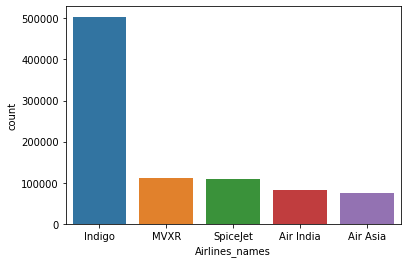

In [ ]:
sns.countplot(x="Airlines_names",data=data,order=pd.value_counts(data["Airlines_names"]).iloc[:5].index)

Creating L2 operator dataframe

1.   Created L2 operator dataframe by dropping unrelevent columns
2.   Subtracting L1 decision from l2 decision time
3.   Converted to time in secs
4.   Dropped negative time 
5.   Dropped default reject in L2 Decision
6.   List item








In [ ]:
l2_operator=data.drop(["MVXR","BHSID","BHSID_prefix","Airlines_names","L3Decision","L3LoginID","L3DecisionTime"],axis=1)#dropped all these columns

l2_operator["timediff1"]=l2_operator["L2DecisionTime"]-l2_operator["Level1Decision"]#subtracting L2Decision time from Level1Decisio
l2_operator["timesecs1"]=l2_operator["timediff1"]/np.timedelta64(1,'s')#Converting into secs from timedelta to int format


In [ ]:

l2_operator.head()

,L2Decision,L2LoginID,timesecs1,performance
0,Time out,32661.0,27.0,Bad
1,Accept,32661.0,13.0,Good
2,Accept,32153.0,5.0,Excellent
3,Accept,32153.0,11.0,Good
4,Accept,32153.0,5.0,Excellent


In [ ]:
l2_operator.isna().sum()

Level1Decision        0
L2Decision            0
L2LoginID         33283
L2DecisionTime        0
timediff1             0
timesecs1             0
dtype: int64

In [ ]:
l2_operator["timesecs1"].nsmallest()#)#display the smallest vlues

4643    0.0
4644    0.0
4773    0.0
4774    0.0
4775    0.0
Name: timesecs1, dtype: float64

In [ ]:
l2_operator=l2_operator.drop(1001241)#)##dropped the negative row values


9.0     50238
8.0     49717
10.0    49483
7.0     48626
11.0    48141
12.0    46741
6.0     46458
13.0    44667
14.0    42778
5.0     41489
15.0    40928
16.0    39327
17.0    37738
18.0    36508
19.0    35114
22.0    34596
20.0    34570
24.0    34507
23.0    34490
4.0     34301
21.0    34163
25.0    33753
3.0     18552
27.0    15207
28.0     6080
2.0      3128
26.0     1134
1.0        88
29.0       21
31.0        2
58.0        1
68.0        1
36.0        1
34.0        1
53.0        1
Name: timesecs1, dtype: int64

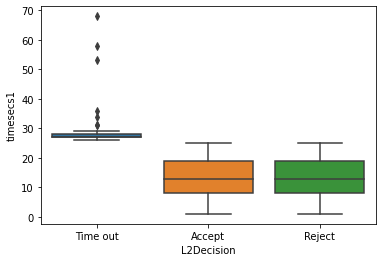

In [ ]:

sns.boxplot(data=l2_operator,x="L2Decision",y="timesecs1")#ploteed for timesec

l2_operator=l2_operator[~(l2_operator["L2Decision"].str.contains("Default Reject"))]


l2_operator=l2_operator[~((l2_operator["L2Decision"].str.contains("Accept")) & (l2_operator.timesecs1>25))]#checking operatorl2 performanceis accepted in  less than 25 sec

l2_operator=l2_operator[~((l2_operator["L2Decision"].str.contains("Reject")) & (l2_operator.timesecs1>25))]#checking operatorl2 performanceis rejected in  less than 25 sec

l2_operator=l2_operator[~((l2_operator.L2Decision.str.contains("Time out"))& (l2_operator.timesecs1<=25))]#checking operatorl2 performanceis timeout in  less than 25 sec


l2_operator["timesecs1"].value_counts()#count the no of sec of bags loaded


In [ ]:
bin_labels=["Excellent","Good","Normal","Bad"]#creating bin labels

l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["timesecs1"]>=0) & (l2_operator["timesecs1"]<8),"performance"]="Excellent"##checking l2 operator performance in the range of 0-8sec

l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["timesecs1"]>=8) & (l2_operator["timesecs1"]<17),"performance"]="Good"##checking l2 operator performance in the range of 0-8sec

l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["timesecs1"]>=17) & (l2_operator["timesecs1"]<=25),"performance"]="Normal"#checking l2 operator performance in the range of17-25 sec

l2_operator.loc[(l2_operator["L2Decision"].str.contains("Time out"))& (l2_operator["timesecs1"]>25) ,"performance"]="Bad"#checking l2 operator performance in the range of above 25sec

l2_operator["performance"].value_counts()#cunt the  operator's performance 

Good         412020
Normal       315439
Excellent    192642
Bad           22449
Name: performance, dtype: int64

In [ ]:
l2_operator.isna().sum()

Level1Decision    0
L2Decision        0
L2LoginID         0
L2DecisionTime    0
timediff1         0
timesecs1         0
performance       0
dtype: int64

In [ ]:
l2_operator=l2_operator.drop(["Level1Decision","L2DecisionTime","timediff1"],axis=1)#dropped all these irrelevant columns

In [ ]:
l2_operator.to_csv("/content/gdrive/My Drive/airport/l2_operator.csv",index=False)

In [ ]:

###### l3 operator 

l3_operator=data.drop(["MVXR","BHSID","BHSID_prefix","Airlines_names","Level1Decision","L2Decision","L2LoginID"],axis=1)#dropped all these columns for l3 operator

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("-"))]##dropped special characters in l3Decision column

l3_operator.isna().sum()#checking null values



l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Default Reject"))]##dropped default rekect from l3decision column

l3_operator["timediff2"]=l3_operator["L3DecisionTime"]-l3_operator["L2DecisionTime"]#]amount of time taken in sec by an operator to perform an l3 check 
l3_operator["timesecs2"]=l3_operator["timediff2"]/np.timedelta64(1,'s')##Converting into secs from timedelta to int format


l3_operator["L3Decision"].value_counts()##count the values of no of l3decision 

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Accept") & (l3_operator.timesecs2>60))]]##createing bin labela for accept of l3 operator

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Reject") & (l3_operator.timesecs2>60))]#createing bin labela for reject of l3 operator

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Time out") & (l3_operator.timesecs2<60))]#createing bin labela for timeout of l3 operator


l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["timesecs2"]>=0) & (l3_operator["timesecs2"]<20),"performance"]="Excellent"#checking l3 operator performance in the range of 0-20sec

l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["timesecs2"]>=20) & (l3_operator["timesecs2"]<40),"performance"]="Good"#checking l3 operator performance in the range of 20-40sec

l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["timesecs2"]>=40) & (l3_operator["timesecs2"]<=60),"performance"]="Normal"#checking l3 operator performance in the range of 40-60sec

l3_operator.loc[(l3_operator["L3Decision"].str.contains("Time out"))& (l3_operator["timesecs2"]>60) ,"performance"]="Bad"#checking l3 operator performance in the range of above 60sec

l3_operator.isna().sum()

l3_operator["performance"].value_counts()#checking count of performance of le operator



Excellent    110473
Good          76913
Normal        39300
Bad            3164
Name: performance, dtype: int64

In [ ]:
l3_operator.isna().sum())##checking null values

L2DecisionTime    0
L3Decision        0
L3LoginID         0
L3DecisionTime    0
timediff2         0
timesecs2         0
performance       0
dtype: int64

In [ ]:
l3_operator=l3_operator.drop(["L2DecisionTime","L3DecisionTime","timediff2"],axis=1)#dropped these irrlevant columns for l3 operator

In [ ]:
l3_operator["L3LoginID"]=l3_operator["L3LoginID"].astype(str).astype(float)#converting float from object for l3loginids

In [ ]:
l3_operator.info()#information about l3 operator

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229850 entries, 0 to 1048573
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   L3Decision   229850 non-null  object 
 1   L3LoginID    229850 non-null  float64
 2   timesecs2    229850 non-null  float64
 3   performance  229850 non-null  object 
dtypes: float64(2), object(2)
memory usage: 8.8+ MB


In [ ]:
l3_operator.to_csv("/content/gdrive/My Drive/airport/l3_operator.csv",index=False)#extracted the l3 operator and created a data frame in csv file